# CNN From Scratch In Python! 
A Python notebook that shows how to implement CNN from scratch in python.

A CNN can be divided into two parts:
- The CNN Part (Convolution, Sigmoid, Maxpool)
- The ANN Part (Flatten, Dense) 

Since our project deals with CNN models, we are only going to implement the CNN part.

## CNN PART 

### Importing the required libraries

In [1]:
from dataset import mnist
from conv import ConvolutionLayer
from maxpool import MaxPoolingLayer
from flatten import FlattenLayer
from activations import Sigmoid
from activations import Softmax

import matplotlib.pyplot as plt
import numpy as np

### Getting the dataset

In [2]:

(X_train, Y_train), (X_test, Y_test) = mnist.getData()

print("X Train Shape: " + str(X_train.shape))
print("Y Train Shape: " + str(Y_train.shape))
print("X Test Shape: " + str(X_test.shape))
print("Y Test Shape: " + str(Y_test.shape))

testImage = X_train[1000]
imgShape = X_train[0].shape
print("Image Shape: " + str(imgShape[0]) + " " + str(imgShape[1]))

X Train Shape: (60000, 28, 28)
Y Train Shape: (60000,)
X Test Shape: (10000, 28, 28)
Y Test Shape: (10000,)
Image Shape: 28 28


### Defining Our CNN ML Model

In [3]:
conv_layer = ConvolutionLayer(1, 3)
sigmoid_layer = Sigmoid
pool_layer = MaxPoolingLayer(2)
conv_layer2 = ConvolutionLayer(1, 2)
sigmoid_layer2 = Sigmoid
pool_layer2 = MaxPoolingLayer(2)

### Displaying one image from our dataset

Shape Of One Train Image: (28, 28)


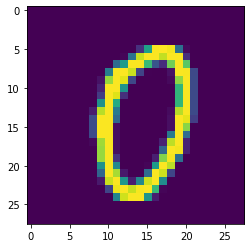

In [4]:
print("Shape Of One Train Image: " + str(testImage.shape))
plt.imshow(testImage)

### Displaying the image after passing through convolution (Feature Map)

Shape Of Feature Map: (26, 26, 1)


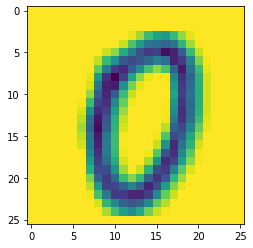

In [5]:
retrieved_img = conv_layer.forward_prop(testImage)

print("Shape Of Feature Map: " + str(retrieved_img.shape))
plt.imshow(retrieved_img[:,:,0])

### Applying the sigmoid activation function

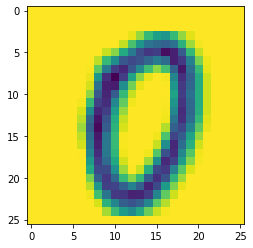

In [6]:
retrieved_img = sigmoid_layer.sigmoid(retrieved_img)
plt.imshow(retrieved_img)

### Displaying the reduced feature map (Max Pooling)

Shape Of Reduced Feature Map: (13, 13, 1)


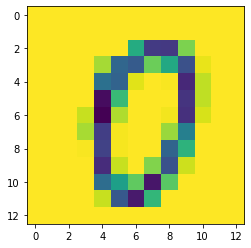

In [7]:
max_pool_img = pool_layer.forward_prop(retrieved_img)
print("Shape Of Reduced Feature Map: " + str(max_pool_img.shape))
plt.imshow(max_pool_img[:,:,0])

### Testing the flatten layer

In [8]:
flattened_image = FlattenLayer.forward(max_pool_img)
print("Shape of flattened image: " + str(flattened_image.shape))
print("It should be equal to: " + str(max_pool_img.shape[0] * max_pool_img.shape[1] * max_pool_img.shape[2]))

Shape of flattened image: (169,)
It should be equal to: 169


### Apply another CNN layer

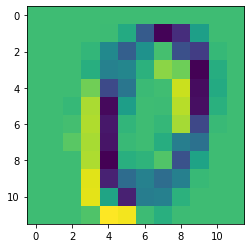

In [9]:
output2 = conv_layer2.forward_prop(max_pool_img[:, :, 0])
plt.imshow(output2)

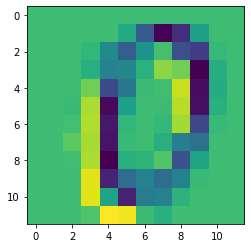

In [10]:
output2 = sigmoid_layer2.sigmoid(output2)
plt.imshow(output2)

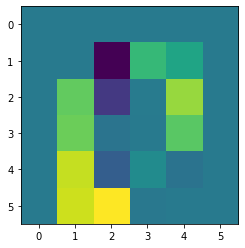

In [11]:
output2 = pool_layer2.forward_prop(output2)
plt.imshow(output2)

We see that the image detoriates and it would not be fiseable to use another convolutional layer for our model hence we will only use one convolutional layer.

## ANN Part 
Now since we are done with the CNN part of the project, we now move on to the ANN part in which we use the dense layer to determine the output of which class does the image belong to.

### Softmax layer
Here we import our softmax layer which acts as a dense layer for the CNN, it performs the the flatteneing of the image and then performs the dot product with the weights and adds bias after which it implements the softmax function.

It takes as input, the shape of the input image and the number of classes in the dataset.

In [12]:
softmax_layer = Softmax(max_pool_img.shape[0] * max_pool_img.shape[1] * max_pool_img.shape[2], 10)

In [13]:
softmax_layer_output = softmax_layer.forward(max_pool_img)

Below we can see the initial probablities which we will train with the help of backward propogation.

In [14]:
print(softmax_layer_output)

[0.10211685 0.10278577 0.10109215 0.10360227 0.09955916 0.09648226
 0.09872254 0.09659142 0.09886164 0.10018594]


### Compute the loss (cross-entropy)

In [15]:
# Compute loss (cross-entropy)
loss = -np.log(softmax_layer_output[0])

In [16]:
print(loss)

2.2816375483766302


### Compute the loss accuracy
0 if did not correctly identify, 1 if correctly identifies

In [17]:
accuracy = 1 if np.argmax(softmax_layer_output) == 0 else 0

In [18]:
print(accuracy)

0


### Initialize the gradient vector (dE_dY)

In [19]:
gradient = np.zeros(10)
gradient[0] = -1/softmax_layer_output[0]

In [20]:
print(gradient)

[-9.79270331  0.          0.          0.          0.          0.
  0.          0.          0.          0.        ]


In [21]:
softmax_layer.backward(gradient, 0.05)

[1.02003139 1.02671312 1.0097958  1.03486905 0.994483   0.96374828
 0.98612608 0.96483866 0.98751554 1.00074383]
[ 0.091689   -0.01049616 -0.01032321 -0.01057954 -0.01016667 -0.00985246
 -0.01008123 -0.00986361 -0.01009544 -0.01023067]


9.988864755901991